In [1]:
import torch
from NetMF import NetMF
from Netmfutils import Netmfutils
import scipy.io
import numpy as np
import networkx as nx
import cogdl.datasets as cd
import scipy.sparse as sp

Using backend: pytorch


In [2]:
if torch.cuda.is_available():
        torch.cuda.set_device(0)

import logging
from cogdl.datasets import build_dataset

logger = logging.getLogger(__name__)
netutils = Netmfutils()

In [3]:
Label_repo = "dataset/blogcatalog.mat"
Rank = 256
Dim = 128
Window = 10
Large_netmf = True
Rand_Seed = 1
Neg_sampling = 1

# Start_train_ratio = 10
# Stop_train_ratio = 90
# Num_train_ratio = 9
C = 1
Num_split = 5
Train_ratio = 80

In [4]:
"""
# load dataset from .mat
data_mat = scipy.io.loadmat(Label_repo)
logger.info("Loading label from %s...", Label_repo)
# load label from .mat
label_mat = netutils.load_label(file=Label_repo, variable_name="group")
logger.info("Label loaded!")
netmf_mat = NetMF(Dim,Window,Rank,Neg_sampling,Large_netmf)
embedding_mat = netmf_mat.train(data_mat['network'],Graph_input = False)
netutils.node_classification_loss(embedding_mat,
                                  label_mat,
                                  train_ratio=Train_ratio/100.,
                                  n_splits=Num_split,
                                  C=C,
                                  random_state=Rand_Seed)
"""

(10312, 39) <class 'numpy.ndarray'> 0 1
Running NetMF for a large window size...
Eigen decomposition...
Maximum eigenvalue %f, minimum eigenvalue %f 0.9999999999999989 0.19200283778553065
Computing D^{-1/2}U..
After filtering, max eigenvalue=%f, min eigenvalue=%f 0.9999999999999989 0.02376280928834499
Computed DeepWalk matrix with %d non-zero elements 43359474
(8249,) (2063,)
(10312, 128) (10312, 39)
(8249,) (2063,)
(10312, 128) (10312, 39)
(8249,) (2063,)
(10312, 128) (10312, 39)
(8249,) (2063,)
(10312, 128) (10312, 39)
(8249,) (2063,)
(10312, 128) (10312, 39)
%d fold validation, training ratio %f 5 0.8
Average micro %.2f, Average macro %.2f 43.21805936542802 28.74779244436939


/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1492: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


([0.4342379958246347,
  0.4441015089163237,
  0.42798353909465026,
  0.4349897889720898,
  0.41959013546370266],
 [0.2891126114644688,
  0.301037644299527,
  0.27527778663597335,
  0.2920992302400772,
  0.2798623495784231])

In [5]:
dataset = cd.build_dataset_from_name('blogcatalog')
data = dataset[0]
G = nx.Graph()
G.add_edges_from(data.edge_index.t().tolist())
label_matrix = sp.csr_matrix(data.y).toarray().astype(np.int)
print (label_matrix.shape)

(10312, 39)


In [6]:
netmf = NetMF(Dim,Window,Rank,Neg_sampling,Large_netmf)
embedding = netmf.train(G,Graph_input = True)
netutils.node_classification_loss(embedding,
                                  label_matrix,
                                  train_ratio=Train_ratio/100.,
                                  n_splits=Num_split,
                                  C=C,
                                  random_state=Rand_Seed)

Running NetMF for a large window size...
Eigen decomposition...
Maximum eigenvalue %f, minimum eigenvalue %f 0.9999999999999991 0.19200283778553026
Computing D^{-1/2}U..
After filtering, max eigenvalue=%f, min eigenvalue=%f 0.9999999999999991 0.023762809288344934
Computed DeepWalk matrix with %d non-zero elements 43359474
(8249,) (2063,)
(10312, 128) (10312, 39)
(8249,) (2063,)
(10312, 128) (10312, 39)
(8249,) (2063,)
(10312, 128) (10312, 39)
(8249,) (2063,)
(10312, 128) (10312, 39)
(8249,) (2063,)
(10312, 128) (10312, 39)
%d fold validation, training ratio %f 5 0.8
Average micro %.2f, Average macro %.2f 43.21805936542802 28.74779244436939


/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1492: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


([0.4342379958246347,
  0.4441015089163237,
  0.42798353909465026,
  0.4349897889720898,
  0.41959013546370266],
 [0.2891126114644688,
  0.301037644299527,
  0.27527778663597335,
  0.2920992302400772,
  0.2798623495784231])

In [7]:
A_cog = sp.csr_matrix(nx.adjacency_matrix(G,nodelist=sorted(G.nodes())))
A = data_mat['network']

In [8]:
unique_mat, counts_mat = np.unique(label_mat, return_counts=True)
dict(zip(unique_mat, counts_mat))


{0: 387692, 1: 14476}

In [9]:
unique_matrix, counts_matrix = np.unique(label_matrix, return_counts=True)
dict(zip(unique_matrix, counts_matrix))
# So we have the same label matrix

{0: 387692, 1: 14476}

In [10]:
unique_A_mat, counts_A_mat = np.unique(A.data, return_counts=True)
dict(zip(unique_A_mat, counts_A_mat))

{1.0: 667966}

In [11]:
unique_A_matrix, counts_A_matrix = np.unique(A_cog.data, return_counts=True)
dict(zip(unique_A_matrix, counts_A_matrix))
# So we have the differernt label matrix

{1: 667966}

In [12]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
A_array = A.toarray()
A_cog_array = A_cog.toarray()

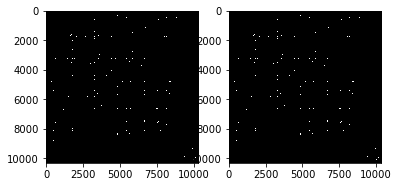

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
# Bilinear interpolation - this will look blurry
ax1.imshow(A_array, interpolation='nearest', cmap=cm.Greys_r)

ax2 = fig.add_subplot(122)
# 'nearest' interpolation - faithful but blocky
ax2.imshow(A_cog_array, interpolation='nearest', cmap=cm.Greys_r)

plt.show()
# So we have Same Adj Matrix.

In [6]:
dataset = cd.build_dataset_from_name("cora")
data = dataset[0]
data = dataset[0]
G = nx.Graph()
G.add_edges_from(data.edge_index.t().tolist())
label_matrix = sp.csr_matrix(data.y).toarray().astype(np.int)
print (label_matrix.shape)

KeyError: 'cora'

In [ ]:
netmf = NetMF(Dim,Window,16384,Neg_sampling,Large_netmf)
embedding = netmf.train(G,Graph_input = True)
netutils.node_classification_loss(embedding,
                                  label_matrix,
                                  train_ratio=Train_ratio/100.,
                                  n_splits=Num_split,
                                  C=C,
                                  random_state=Rand_Seed)